# [1] Loading Data 

## Creating Final Dataset

In [ ]:
import pandas as pd
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
final_dataset = pd.read_csv('/content/drive/My Drive/ADS Final Project/Datasets/Nov_10/FinalDataset_Nov10_2.csv')
#final_dataset = pd.read_csv('FinalDataset_Nov10_2.csv')
#final_dataset = final_dataset.fillna(0)
#final_dataset = final_dataset.dropna()

In [ ]:
historical_wildfires = pd.read_csv('/content/drive/My Drive/ADS Final Project/Datasets/Nov_10/Historical_Wildfires.csv')
#historical_wildfires = pd.read_csv('Historical_Wildfires.csv')

In [ ]:
historical_wildfires['New_Date'] = ''
for idx, val in enumerate(historical_wildfires['Date']):
  lst = val.split('/')
  newval = lst[0] + '/' + lst[1] + '/' + lst[2][-2:]
  historical_wildfires['New_Date'][idx] = newval

<ipython-input-4-a79dda82a1ed>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  historical_wildfires['New_Date'][idx] = newval


In [ ]:
final_dataset['New_Date'] = ''
for idx, val in enumerate(final_dataset['Date']):
  if val != 0:
    lst = val.split('/')
    newval = lst[1] + '/' + lst[0] + '/' + lst[2]
    final_dataset['New_Date'][idx] = newval

<ipython-input-5-fcf502ca235a>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_dataset['New_Date'][idx] = newval


In [ ]:
final_dataset = final_dataset.merge(historical_wildfires, how='inner', on=['New_Date', 'Region'])

In [ ]:
final_dataset = final_dataset.fillna(0)

## Checking Range of Values for our Outcome Variables

Estimated Fire Area 

Minimum value: 1.0
Maximum value: 10120.94317
Range of values: 10119.94317


<Axes: title={'center': 'Distribution of Estimated Fire Area'}, ylabel='Density'>

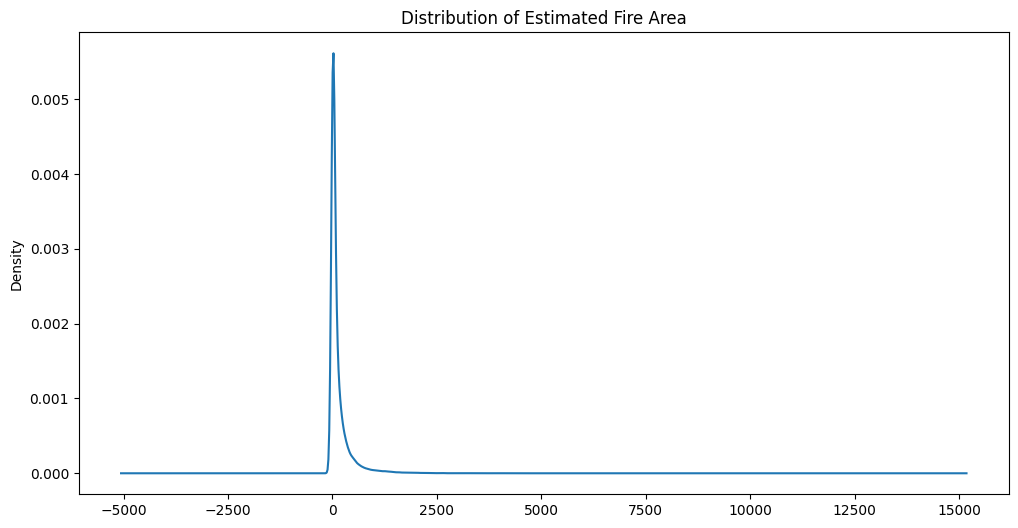

In [ ]:
# Calculate the minimum and maximum values of the "Estimated_fire_area" column
min_value = final_dataset["Estimated_fire_area"].min()
max_value = final_dataset["Estimated_fire_area"].max()

# Calculate the range of values
value_range = max_value - min_value

# Print the results
print(f"Minimum value: {min_value}")
print(f"Maximum value: {max_value}")
print(f"Range of values: {value_range}")

final_dataset['Estimated_fire_area'].plot(kind='kde', title='Distribution of Estimated Fire Area', xlabel='Values', ylabel='Density')

Mean Estimated Fire Brightness

Minimum value: 290.7
Maximum value: 381.95
Range of values: 91.25


<Axes: title={'center': 'Distribution of Mean Estimated Fire Brightness'}, ylabel='Density'>

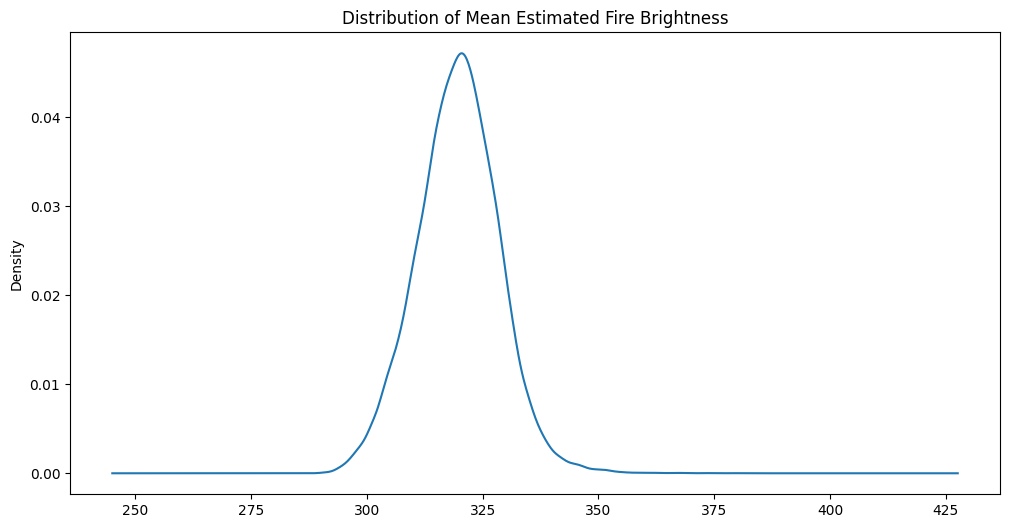

In [ ]:
# Calculate the minimum and maximum values of the "Mean Estimated Fire Brightness" column
min_value = final_dataset["Mean_estimated_fire_brightness"].min()
max_value = final_dataset["Mean_estimated_fire_brightness"].max()

# Calculate the range of values
value_range = max_value - min_value

# Print the results
print(f"Minimum value: {min_value}")
print(f"Maximum value: {max_value}")
print(f"Range of values: {value_range}")

final_dataset['Mean_estimated_fire_brightness'].plot(kind='kde', title='Distribution of Mean Estimated Fire Brightness', xlabel='Values', ylabel='Density')

Mean Estimated Fire Radiative Power

Minimum value: 0.0
Maximum value: 2178.6
Range of values: 2178.6


<Axes: title={'center': 'Distribution of Mean Estimated Fire Radiative Power'}, ylabel='Density'>

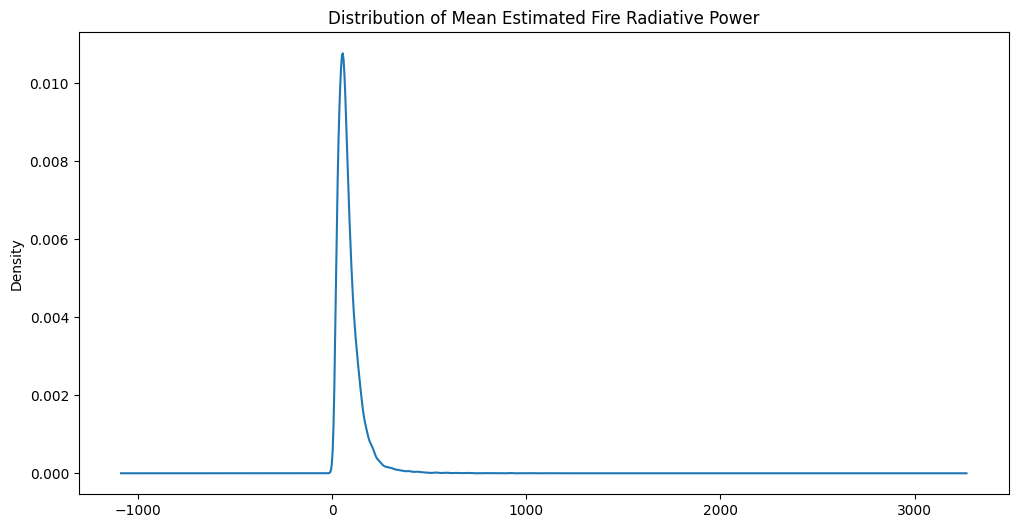

In [ ]:
# Calculate the minimum and maximum values of the "Mean Estimated Fire Radiative Power" column
min_value = final_dataset["Mean_estimated_fire_radiative_power"].min()
max_value = final_dataset["Mean_estimated_fire_radiative_power"].max()

# Calculate the range of values
value_range = max_value - min_value

# Print the results
print(f"Minimum value: {min_value}")
print(f"Maximum value: {max_value}")
print(f"Range of values: {value_range}")

final_dataset['Mean_estimated_fire_radiative_power'].plot(kind='kde', title='Distribution of Mean Estimated Fire Radiative Power', xlabel='Values', ylabel='Density')

Count of Fires Per Day

Minimum value: 1
Maximum value: 3954
Range of values: 3953


<Axes: title={'center': 'Distribution of Count of Fires Per Day'}, ylabel='Density'>

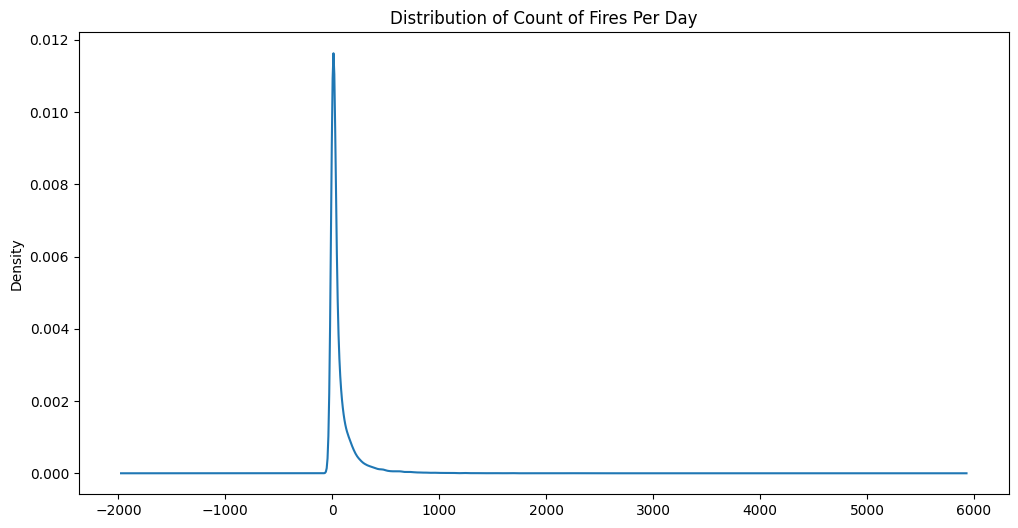

In [ ]:
# Calculate the minimum and maximum values of the "Count of Fires per day" column
min_value = final_dataset["Count"].min()
max_value = final_dataset["Count"].max()

# Calculate the range of values
value_range = max_value - min_value

# Print the results
print(f"Minimum value: {min_value}")
print(f"Maximum value: {max_value}")
print(f"Range of values: {value_range}")

final_dataset['Count'].plot(kind='kde', title='Distribution of Count of Fires Per Day', xlabel='Values', ylabel='Density')

## Splitting dataset into features and predictors

In [ ]:
X = final_dataset.iloc[:,2:48]
y = final_dataset.iloc[:,50:].drop(['Mean_confidence', 'Std_confidence', 'Var_confidence', 'Replaced'], axis=1)

## Visualizing Outcome Variables

### Estimated Fire Area

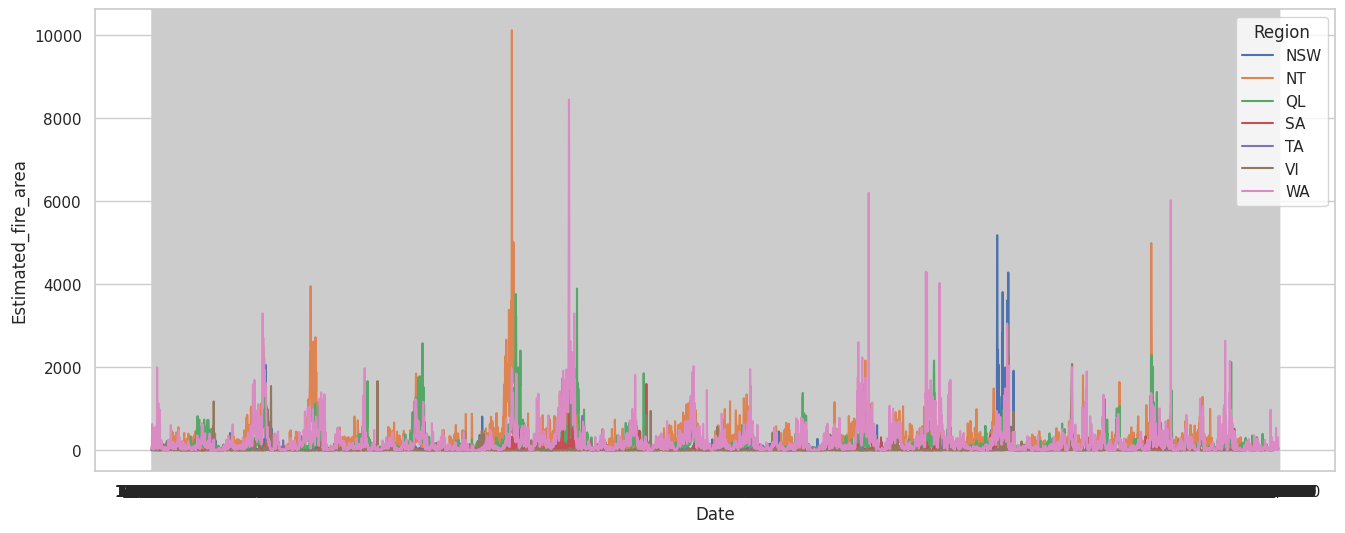

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(16, 6))
sns.set(style="whitegrid")
g = sns.lineplot(x="Date", y="Estimated_fire_area",hue='Region', data=historical_wildfires)

<Figure size 1200x1200 with 0 Axes>

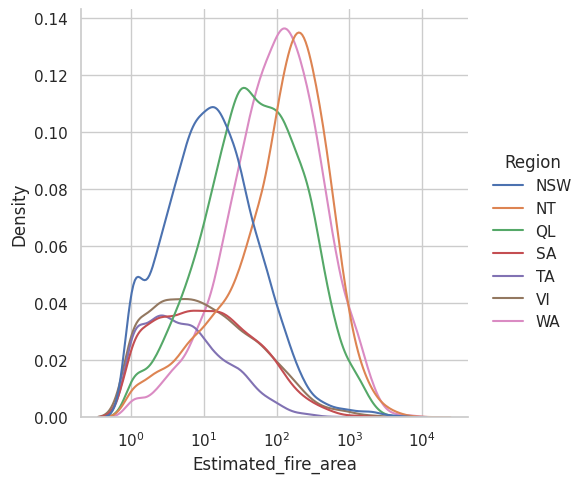

In [ ]:
plt.figure(figsize=(12, 12));
sns.set(style="whitegrid")
g = sns.displot(data=historical_wildfires, x="Estimated_fire_area", hue="Region", kind="kde", log_scale=True);

# [2] Evaluating Dataset

In [ ]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26402 entries, 0 to 26401
Data columns (total 46 columns):
 #   Column                                                    Non-Null Count  Dtype  
---  ------                                                    --------------  -----  
 0   Precipitation count()[unit: km^2]                         26402 non-null  float64
 1   Precipitation mean()                                      26402 non-null  float64
 2   Relative Humidity count()[unit: km^2]                     26402 non-null  float64
 3   Relative humidity mean()                                  26402 non-null  float64
 4   Soil water content count()[unit: km^2]                    26402 non-null  float64
 5   Soil water content mean()                                 26402 non-null  float64
 6   Solar radiation count()[unit: km^2]                       26402 non-null  float64
 7   Solar radiation mean()                                    26402 non-null  float64
 8   Temperature coun

In [ ]:
X.head()

,Precipitation count()[unit: km^2],Precipitation mean(),Relative Humidity count()[unit: km^2],Relative humidity mean(),Soil water content count()[unit: km^2],Soil water content mean(),Solar radiation count()[unit: km^2],Solar radiation mean(),Temperature count()[unit: km^2],Temperature mean(),...,Forecast RelativeHumidity mean(),Forecast SolarRadiation Lead time,Forecast SolarRadiation count()[unit: km^2],Forecast SolarRadiation mean(),Forecast Temperature Lead time,Forecast Temperature count()[unit: km^2],Forecast Temperature mean(),Forecast WindSpeed Lead time,Forecast WindSpeed count()[unit: km^2],Forecast WindSpeed mean()
0,800234.349,2.808620,800234.349,57.095628,800234.349,0.214293,800234.349,22.617291,800234.349,23.055527,...,57.095628,0,800234.349,22.617291,0,800234.349,23.055527,0,800234.349,4.841764
1,800234.349,0.157935,800234.349,47.170735,800234.349,0.203951,800234.349,28.076835,800234.349,22.425765,...,47.170735,0,800234.349,28.076835,0,800234.349,22.425765,0,800234.349,4.014080
2,800234.349,0.434833,800234.349,39.874638,800234.349,0.193668,800234.349,30.561703,800234.349,20.621405,...,39.874638,0,800234.349,30.561703,0,800234.349,20.621405,0,800234.349,4.477879
3,800234.349,0.064224,800234.349,39.279410,800234.349,0.183778,800234.349,32.143718,800234.349,19.632722,...,39.279410,0,800234.349,32.143718,0,800234.349,19.632722,0,800234.349,4.017578
4,800234.349,0.203352,800234.349,42.400824,800234.349,0.175935,800234.349,29.347715,800234.349,21.477315,...,42.400824,0,800234.349,29.347715,0,800234.349,21.477315,0,800234.349,3.884550


### Correlation Matrix

<Axes: >

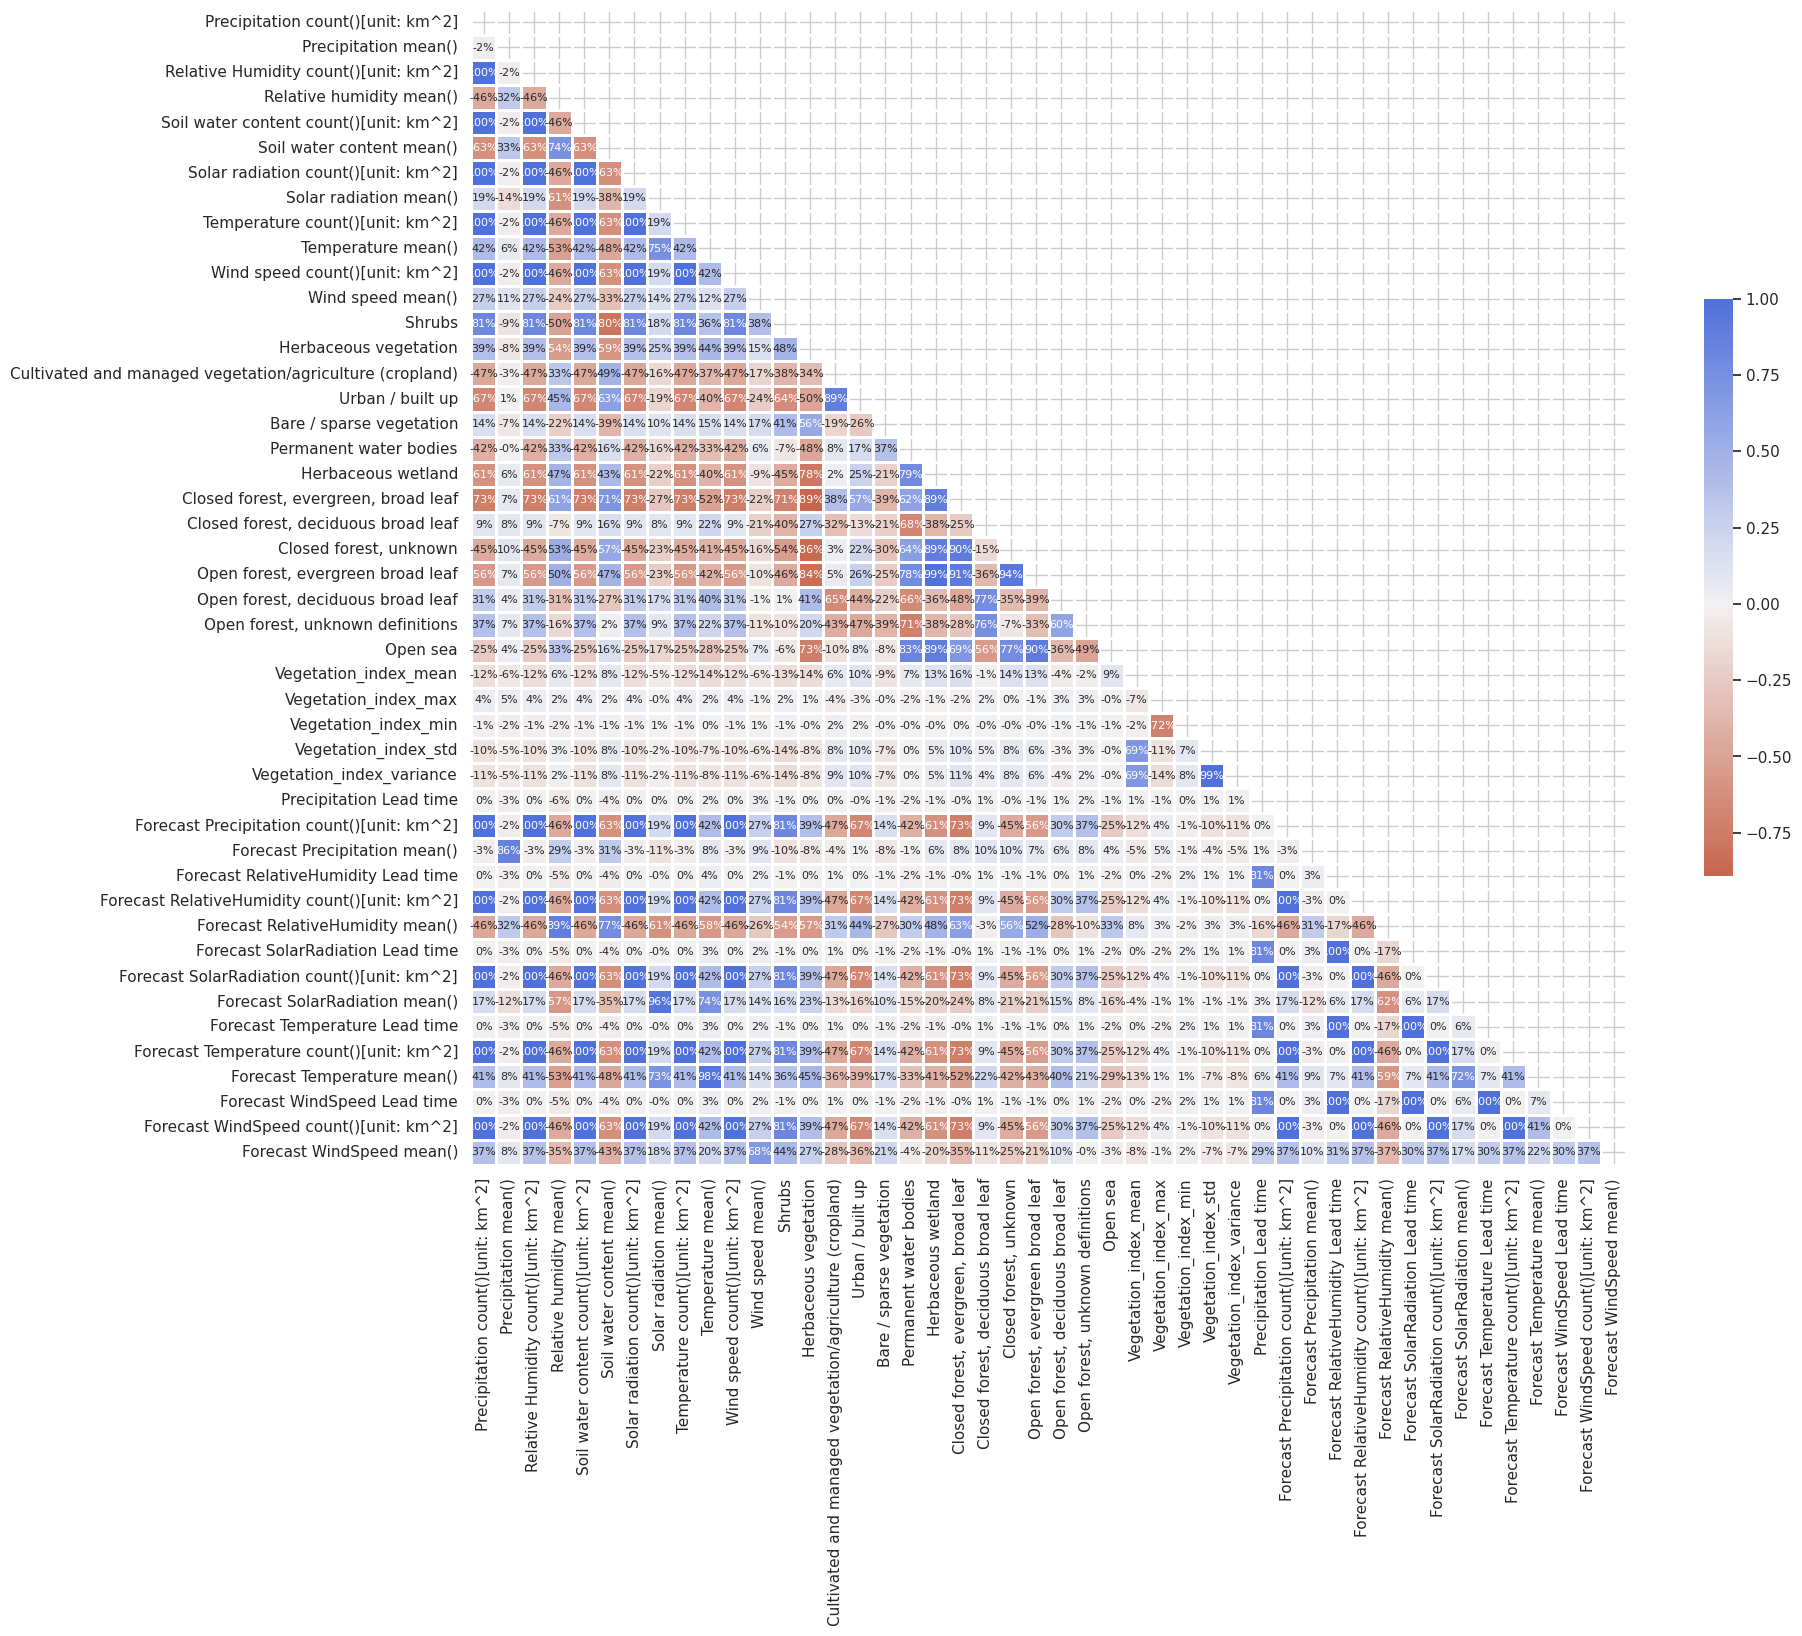

In [ ]:
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

# Compute the correlation matrix
corr = X.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(20, 15))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(20, 260, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=1, center=0, annot=True,
            square=True, linewidths=.75, cbar_kws={"shrink": .5},
            annot_kws={'size': 8}, fmt='.0%')

  Due to the high multicollinearity of the variables, a PCA is advised.

# [3] Dimensionality Reduction

### PCA

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
data_rescaled = scaler.fit_transform(X)

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 0.95)
pca.fit(data_rescaled)
reduced = pca.transform(data_rescaled)

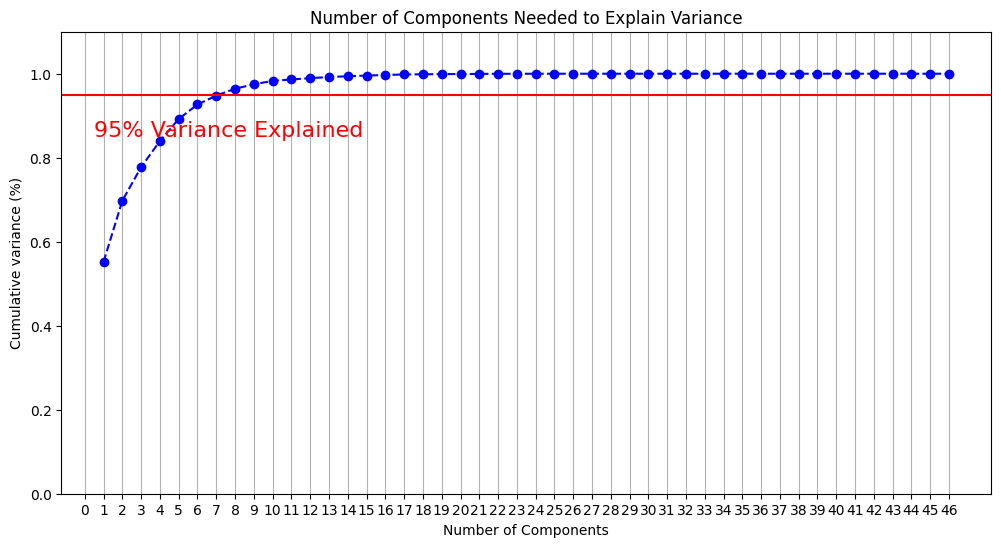

In [ ]:
pca = PCA().fit(data_rescaled)
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (12,6)

fig, ax = plt.subplots()
xi = np.arange(1, 47, step=1)
yi = np.cumsum(pca.explained_variance_ratio_)

plt.ylim(0.0,1.1)
plt.plot(xi, yi, marker='o', linestyle='--', color='b')

plt.xlabel('Number of Components')
plt.xticks(np.arange(0, 47, step=1)) #change from 0-based array index to 1-based human-readable label
plt.ylabel('Cumulative variance (%)')
plt.title('Number of Components Needed to Explain Variance')

plt.axhline(y=0.95, color='r', linestyle='-')
plt.text(0.5, 0.85, '95% Variance Explained', color = 'red', fontsize=16)

ax.grid(axis='x')
plt.show()

Therefore, to explain 95% of the variance in the model, we need 9 PCA components.

In [ ]:
X.columns

Index(['Precipitation count()[unit: km^2]', 'Precipitation mean()',
       'Relative Humidity count()[unit: km^2]', 'Relative humidity mean()',
       'Soil water content count()[unit: km^2]', 'Soil water content mean()',
       'Solar radiation count()[unit: km^2]', 'Solar radiation mean()',
       'Temperature count()[unit: km^2]', 'Temperature mean()',
       'Wind speed count()[unit: km^2]', 'Wind speed mean()', 'Shrubs',
       'Herbaceous vegetation',
       'Cultivated and managed vegetation/agriculture (cropland)',
       'Urban / built up', 'Bare / sparse vegetation',
       'Permanent water bodies', 'Herbaceous wetland',
       'Closed forest, evergreen, broad leaf',
       'Closed forest, deciduous broad leaf', 'Closed forest, unknown',
       'Open forest, evergreen broad leaf',
       'Open forest, deciduous broad leaf', 'Open forest, unknown definitions',
       'Open sea', 'Vegetation_index_mean', 'Vegetation_index_max',
       'Vegetation_index_min', 'Vegetation_index_s

# [4] Models

## Regression Models

###The following tests different regression models to predict the estimated fire area:

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y['Estimated_fire_area'], test_size=0.30, random_state=40)

In [ ]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

pca = PCA(n_components = 9)
 
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

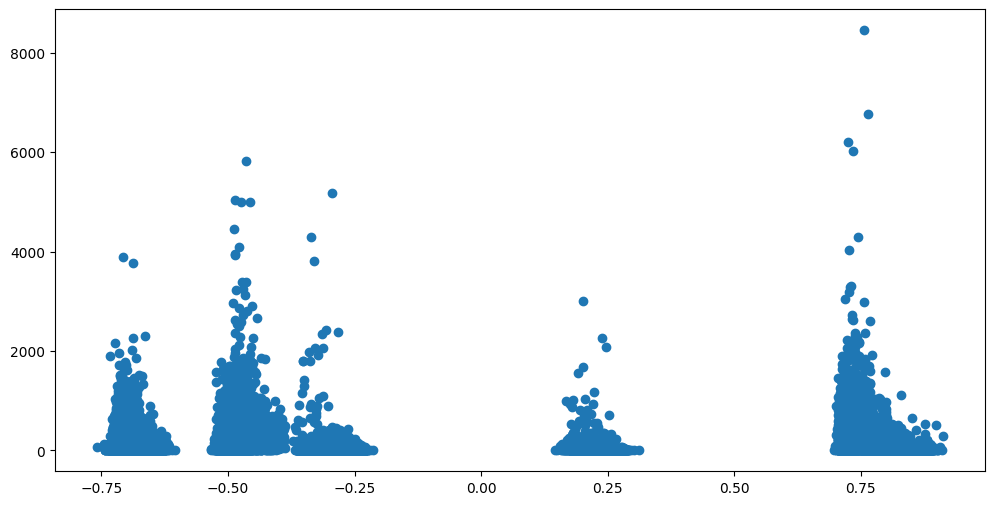

In [ ]:
import matplotlib.pyplot as plt
plt.scatter(X_train[:, 1], y_train)

Linear regression:

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
import numpy as np
lr = LinearRegression()
lr.fit(X_train, y_train)
LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1)
pred_train_lr= lr.predict(X_train)
print(np.sqrt(mean_squared_error(y_train,pred_train_lr)))
print(r2_score(y_train, pred_train_lr))

pred_test_lr= lr.predict(X_test)
print(np.sqrt(mean_squared_error(y_test,pred_test_lr))) 
print(r2_score(y_test, pred_test_lr))

289.30986773667763
0.15701952321132018
288.8525080809335
0.14823555729786342


Ridge regression:

In [ ]:
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
import numpy as np

rr = Ridge(alpha=0.01)
rr.fit(X_train, y_train) 
pred_train_rr= rr.predict(X_train)
print(np.sqrt(mean_squared_error(y_train,pred_train_rr)))
print(r2_score(y_train, pred_train_rr))

pred_test_rr= rr.predict(X_test)
print(np.sqrt(mean_squared_error(y_test,pred_test_rr))) 
print(r2_score(y_test, pred_test_rr))

289.3098677385011
0.157019523200694
288.8524865397438
0.14823568433860745


Lasso regression:

In [ ]:
from sklearn.linear_model import Lasso

model_lasso = Lasso(alpha=0.01)
model_lasso.fit(X_train, y_train) 
pred_train_lasso= model_lasso.predict(X_train)
print(np.sqrt(mean_squared_error(y_train,pred_train_lasso)))
print(r2_score(y_train, pred_train_lasso))

pred_test_lasso= model_lasso.predict(X_test)
print(np.sqrt(mean_squared_error(y_test,pred_test_lasso))) 
print(r2_score(y_test, pred_test_lasso))

289.3098873551474
0.15701940888416188
288.85013737836596
0.1482495386330318


###The following tests different regression models to predict the mean estimated fire brightness:

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y['Mean_estimated_fire_brightness'], test_size=0.30, random_state=40)

In [ ]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

pca = PCA(n_components = 9)
 
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

In [ ]:
import matplotlib.pyplot as plt
plt.scatter(X[:, 0], y)

InvalidIndexError: ignored

Linear regression:

In [ ]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train, y_train)
LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1)
pred_train_lr= lr.predict(X_train)
print(np.sqrt(mean_squared_error(y_train,pred_train_lr)))
print(r2_score(y_train, pred_train_lr))

pred_test_lr= lr.predict(X_test)
print(np.sqrt(mean_squared_error(y_test,pred_test_lr))) 
print(r2_score(y_test, pred_test_lr))

6.972864025454615
0.3813947543203049
6.946337501021214
0.38432232735840965


Ridge regression:

In [ ]:
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
import numpy as np

rr = Ridge(alpha=0.01)
rr.fit(X_train, y_train) 
pred_train_rr= rr.predict(X_train)
print(np.sqrt(mean_squared_error(y_train,pred_train_rr)))
print(r2_score(y_train, pred_train_rr))

pred_test_rr= rr.predict(X_test)
print(np.sqrt(mean_squared_error(y_test,pred_test_rr))) 
print(r2_score(y_test, pred_test_rr))

6.972864025490075
0.38139475431401293
6.946337620259805
0.3843223062213602


Lasso regression:

In [ ]:
from sklearn.linear_model import Lasso

model_lasso = Lasso(alpha=0.01)
model_lasso.fit(X_train, y_train) 
pred_train_lasso= model_lasso.predict(X_train)
print(np.sqrt(mean_squared_error(y_train,pred_train_lasso)))
print(r2_score(y_train, pred_train_lasso))

pred_test_lasso= model_lasso.predict(X_test)
print(np.sqrt(mean_squared_error(y_test,pred_test_lasso))) 
print(r2_score(y_test, pred_test_lasso))

6.9736779644336755
0.3812503269207945
6.947172150718811
0.38417436274943073


###The following tests different regression models to estimate the mean estimated fire radiative power

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y['Mean_estimated_fire_radiative_power'], test_size=0.30, random_state=40)

In [ ]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

pca = PCA(n_components = 9)
 
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

Linear regression:

In [ ]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train, y_train)
LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1)
pred_train_lr= lr.predict(X_train)
print(np.sqrt(mean_squared_error(y_train,pred_train_lr)))
print(r2_score(y_train, pred_train_lr))

pred_test_lr= lr.predict(X_test)
print(np.sqrt(mean_squared_error(y_test,pred_test_lr))) 
print(r2_score(y_test, pred_test_lr))

64.47017964373447
0.09204126174262728
63.999487577045834
0.0920114286461654


Ridge regression:

In [ ]:
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
import numpy as np

rr = Ridge(alpha=0.01)
rr.fit(X_train, y_train) 
pred_train_rr= rr.predict(X_train)
print(np.sqrt(mean_squared_error(y_train,pred_train_rr)))
print(r2_score(y_train, pred_train_rr))

pred_test_rr= rr.predict(X_test)
print(np.sqrt(mean_squared_error(y_test,pred_test_rr))) 
print(r2_score(y_test, pred_test_rr))

64.47017964382557
0.092041261740061
63.999485691062894
0.09201148216068544


Lasso regression:

In [ ]:
from sklearn.linear_model import Lasso

model_lasso = Lasso(alpha=0.01)
model_lasso.fit(X_train, y_train) 
pred_train_lasso= model_lasso.predict(X_train)
print(np.sqrt(mean_squared_error(y_train,pred_train_lasso)))
print(r2_score(y_train, pred_train_lasso))

pred_test_lasso= model_lasso.predict(X_test)
print(np.sqrt(mean_squared_error(y_test,pred_test_lasso))) 
print(r2_score(y_test, pred_test_lasso))

64.47026768154095
0.09203878199925719
63.999820916242946
0.09200197016513578


### The following tests different regression models to estimate the count of fires per day

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y['Count'], test_size=0.30, random_state=40)

Linear regression:

In [ ]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train, y_train)
LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1)
pred_train_lr= lr.predict(X_train)
print(np.sqrt(mean_squared_error(y_train,pred_train_lr)))
print(r2_score(y_train, pred_train_lr))

pred_test_lr= lr.predict(X_test)
print(np.sqrt(mean_squared_error(y_test,pred_test_lr))) 
print(r2_score(y_test, pred_test_lr))

137.44643726353908
0.16715746704810974
139.34326664140517
0.1578110237174707


Ridge regression:

In [ ]:
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
import numpy as np

rr = Ridge(alpha=0.01)
rr.fit(X_train, y_train) 
pred_train_rr= rr.predict(X_train)
print(np.sqrt(mean_squared_error(y_train,pred_train_rr)))
print(r2_score(y_train, pred_train_rr))

pred_test_rr= rr.predict(X_test)
print(np.sqrt(mean_squared_error(y_test,pred_test_rr))) 
print(r2_score(y_test, pred_test_rr))

137.4617279461177
0.16697215210766525
139.3473777846731
0.15776132758647188


Lasso regression:

In [ ]:
from sklearn.linear_model import Lasso

model_lasso = Lasso(alpha=0.01)
model_lasso.fit(X_train, y_train) 
pred_train_lasso= model_lasso.predict(X_train)
print(np.sqrt(mean_squared_error(y_train,pred_train_lasso)))
print(r2_score(y_train, pred_train_lasso))

pred_test_lasso= model_lasso.predict(X_test)
print(np.sqrt(mean_squared_error(y_test,pred_test_lasso))) 
print(r2_score(y_test, pred_test_lasso))

137.54526772324667
0.1659593304576925
139.42256013558168
0.15685225320840745


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.750e+08, tolerance: 4.192e+04
  model = cd_fast.enet_coordinate_descent(


## Artificial Neural Networks

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

### The following uses different Artifical Neural Networks to predict the estimated fire area

Fully Connected Neural Network (Multilayer Perceptron)

In [ ]:
# Train-Test Split
scaler = StandardScaler()
X_train, X_test, y_train, y_test = train_test_split(X, y['Estimated_fire_area'], test_size=0.30, random_state=40)
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
pca = PCA(n_components=9)
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

# Create the fully connected neural network model
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)))
model.add(layers.Dense(32, activation='relu'))
model.add(layers.Dense(1, activation='linear'))

# Compile the model
model.compile(optimizer=Adam(), loss='mean_squared_error', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=20, batch_size=64, validation_split=0.2)

# Evaluate the model
y_pred_train = model.predict(X_train).flatten()
y_pred_test = model.predict(X_test)

# Calculate RMSE and R^2
te_rmse = np.sqrt(mean_squared_error(y_test, y_pred_test))
te_r2 = r2_score(y_test, y_pred_test)

tr_rmse = np.sqrt(mean_squared_error(y_train, y_pred_train))
tr_r2 = r2_score(y_train, y_pred_train)

print(f"Train RMSE: {tr_rmse:.2f}")
print(f"Train R^2: {tr_r2:.2f}")

print(f"Test RMSE: {te_rmse:.2f}")
print(f"Test R^2: {te_r2:.2f}")

Epoch 1/20
231/231 [==============================] - 3s 5ms/step - loss: 108549.3281 - accuracy: 0.0226 - val_loss: 66470.5391 - val_accuracy: 0.0214
Epoch 2/20
231/231 [==============================] - 1s 5ms/step - loss: 86982.6562 - accuracy: 0.0229 - val_loss: 64409.9570 - val_accuracy: 0.0214
Epoch 3/20
231/231 [==============================] - 1s 5ms/step - loss: 85935.6875 - accuracy: 0.0229 - val_loss: 63768.6719 - val_accuracy: 0.0214
Epoch 4/20
231/231 [==============================] - 1s 5ms/step - loss: 85359.1328 - accuracy: 0.0226 - val_loss: 63317.1484 - val_accuracy: 0.0211
Epoch 5/20
231/231 [==============================] - 1s 4ms/step - loss: 84813.3359 - accuracy: 0.0221 - val_loss: 62974.0195 - val_accuracy: 0.0197
Epoch 6/20
231/231 [==============================] - 1s 6ms/step - loss: 84458.4609 - accuracy: 0.0212 - val_loss: 62584.7461 - val_accuracy: 0.0197
Epoch 7/20
231/231 [==============================] - 2s 7ms/step - loss: 84019.5938 - accuracy: 0.

Recurrent Neural Network (LSTM)

In [ ]:
scaler = StandardScaler()
X_train, X_test, y_train, y_test = train_test_split(X, y['Estimated_fire_area'], test_size=0.30, random_state=40)
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
pca = PCA(n_components=9)
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

# Reshape data for RNN input (sequences, features)
X_train = X_train.reshape(X_train.shape[0], 1, X_train.shape[1])
X_test = X_test.reshape(X_test.shape[0], 1, X_test.shape[1])

# Create the recurrent neural network model
model = models.Sequential()
model.add(layers.LSTM(64, activation='relu', input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(layers.Dense(32, activation='relu'))
model.add(layers.Dense(1, activation='linear'))

# Compile the model
model.compile(optimizer=Adam(), loss='mean_squared_error', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=20, batch_size=64, validation_split=0.2)

# Evaluate the model
y_pred_train = model.predict(X_train).flatten()
y_pred_test = model.predict(X_test)

# Calculate RMSE and R^2
te_rmse = np.sqrt(mean_squared_error(y_test, y_pred_test))
te_r2 = r2_score(y_test, y_pred_test)

tr_rmse = np.sqrt(mean_squared_error(y_train, y_pred_train))
tr_r2 = r2_score(y_train, y_pred_train)

print(f"Train RMSE: {tr_rmse:.2f}")
print(f"Train R^2: {tr_r2:.2f}")

print(f"Test RMSE: {te_rmse:.2f}")
print(f"Test R^2: {te_r2:.2f}")

Epoch 1/20
231/231 [==============================] - 4s 7ms/step - loss: 111692.7422 - accuracy: 0.0210 - val_loss: 65311.1133 - val_accuracy: 0.0214
Epoch 2/20
231/231 [==============================] - 1s 5ms/step - loss: 85213.4297 - accuracy: 0.0229 - val_loss: 62814.7578 - val_accuracy: 0.0214
Epoch 3/20
231/231 [==============================] - 1s 5ms/step - loss: 83960.5781 - accuracy: 0.0229 - val_loss: 62196.8867 - val_accuracy: 0.0214
Epoch 4/20
231/231 [==============================] - 1s 6ms/step - loss: 83272.2500 - accuracy: 0.0229 - val_loss: 61981.3398 - val_accuracy: 0.0214
Epoch 5/20
231/231 [==============================] - 2s 7ms/step - loss: 82824.5469 - accuracy: 0.0229 - val_loss: 61329.5703 - val_accuracy: 0.0214
Epoch 6/20
231/231 [==============================] - 1s 5ms/step - loss: 82423.6016 - accuracy: 0.0229 - val_loss: 60989.5312 - val_accuracy: 0.0214
Epoch 7/20
231/231 [==============================] - 1s 4ms/step - loss: 82101.1953 - accuracy: 0.

### The following uses different Artificial Neural Networks to predict the mean estimated fire brightness

Fully Connected Neural Network (Multilayer Perceptron)

In [ ]:
# Train-Test Split
scaler = StandardScaler()
X_train, X_test, y_train, y_test = train_test_split(X, y['Mean_estimated_fire_brightness'], test_size=0.30, random_state=40)
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
pca = PCA(n_components=9)
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

# Create the fully connected neural network model
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)))
model.add(layers.Dense(32, activation='relu'))
model.add(layers.Dense(1, activation='linear'))

# Compile the model
model.compile(optimizer=Adam(), loss='mean_squared_error', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=20, batch_size=64, validation_split=0.2)

# Evaluate the model
y_pred_train = model.predict(X_train).flatten()
y_pred_test = model.predict(X_test)

# Calculate RMSE and R^2
te_rmse = np.sqrt(mean_squared_error(y_test, y_pred_test))
te_r2 = r2_score(y_test, y_pred_test)

tr_rmse = np.sqrt(mean_squared_error(y_train, y_pred_train))
tr_r2 = r2_score(y_train, y_pred_train)

print(f"Train RMSE: {tr_rmse:.2f}")
print(f"Train R^2: {tr_r2:.2f}")

print(f"Test RMSE: {te_rmse:.2f}")
print(f"Test R^2: {te_r2:.2f}")

Epoch 1/20
231/231 [==============================] - 2s 4ms/step - loss: 67280.7500 - accuracy: 0.0000e+00 - val_loss: 10463.3467 - val_accuracy: 0.0000e+00
Epoch 2/20
231/231 [==============================] - 1s 3ms/step - loss: 2502.2168 - accuracy: 0.0000e+00 - val_loss: 1078.8702 - val_accuracy: 0.0000e+00
Epoch 3/20
231/231 [==============================] - 1s 3ms/step - loss: 869.5906 - accuracy: 0.0000e+00 - val_loss: 684.8240 - val_accuracy: 0.0000e+00
Epoch 4/20
231/231 [==============================] - 1s 3ms/step - loss: 551.5517 - accuracy: 0.0000e+00 - val_loss: 476.2785 - val_accuracy: 0.0000e+00
Epoch 5/20
231/231 [==============================] - 1s 3ms/step - loss: 387.4465 - accuracy: 0.0000e+00 - val_loss: 367.3473 - val_accuracy: 0.0000e+00
Epoch 6/20
231/231 [==============================] - 1s 5ms/step - loss: 299.2466 - accuracy: 0.0000e+00 - val_loss: 299.3539 - val_accuracy: 0.0000e+00
Epoch 7/20
231/231 [==============================] - 1s 5ms/step - lo

Recurrent Neural Network (LSTM)

In [ ]:
scaler = StandardScaler()
X_train, X_test, y_train, y_test = train_test_split(X, y['Mean_estimated_fire_brightness'], test_size=0.30, random_state=40)
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
pca = PCA(n_components=9)
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

# Reshape data for RNN input (sequences, features)
X_train = X_train.reshape(X_train.shape[0], 1, X_train.shape[1])
X_test = X_test.reshape(X_test.shape[0], 1, X_test.shape[1])

# Create the recurrent neural network model
model = models.Sequential()
model.add(layers.LSTM(64, activation='relu', input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(layers.Dense(32, activation='relu'))
model.add(layers.Dense(1, activation='linear'))

# Compile the model
model.compile(optimizer=Adam(), loss='mean_squared_error', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=20, batch_size=64, validation_split=0.2)

# Evaluate the model
y_pred_train = model.predict(X_train).flatten()
y_pred_test = model.predict(X_test)

# Calculate RMSE and R^2
te_rmse = np.sqrt(mean_squared_error(y_test, y_pred_test))
te_r2 = r2_score(y_test, y_pred_test)

tr_rmse = np.sqrt(mean_squared_error(y_train, y_pred_train))
tr_r2 = r2_score(y_train, y_pred_train)

print(f"Train RMSE: {tr_rmse:.2f}")
print(f"Train R^2: {tr_r2:.2f}")

print(f"Test RMSE: {te_rmse:.2f}")
print(f"Test R^2: {te_r2:.2f}")

Epoch 1/20
231/231 [==============================] - 5s 9ms/step - loss: 79399.5234 - accuracy: 0.0000e+00 - val_loss: 22787.8711 - val_accuracy: 0.0000e+00
Epoch 2/20
231/231 [==============================] - 2s 9ms/step - loss: 5221.7954 - accuracy: 0.0000e+00 - val_loss: 1492.8530 - val_accuracy: 0.0000e+00
Epoch 3/20
231/231 [==============================] - 3s 11ms/step - loss: 1032.8732 - accuracy: 0.0000e+00 - val_loss: 838.1428 - val_accuracy: 0.0000e+00
Epoch 4/20
231/231 [==============================] - 3s 11ms/step - loss: 596.7842 - accuracy: 0.0000e+00 - val_loss: 568.6149 - val_accuracy: 0.0000e+00
Epoch 5/20
231/231 [==============================] - 2s 7ms/step - loss: 413.8887 - accuracy: 0.0000e+00 - val_loss: 431.4325 - val_accuracy: 0.0000e+00
Epoch 6/20
231/231 [==============================] - 1s 6ms/step - loss: 315.9098 - accuracy: 0.0000e+00 - val_loss: 340.3618 - val_accuracy: 0.0000e+00
Epoch 7/20
231/231 [==============================] - 2s 7ms/step -

### The following uses different Artificial Neural Networks to predict the mean estimated fire radiative power

Fully Connected Neural Network (Multilayer Perceptron)

In [ ]:
# Train-Test Split
scaler = StandardScaler()
X_train, X_test, y_train, y_test = train_test_split(X, y['Mean_estimated_fire_radiative_power'], test_size=0.30, random_state=40)
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
pca = PCA(n_components=9)
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

# Create the fully connected neural network model
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)))
model.add(layers.Dense(32, activation='relu'))
model.add(layers.Dense(1, activation='linear'))

# Compile the model
model.compile(optimizer=Adam(), loss='mean_squared_error', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=20, batch_size=64, validation_split=0.2)

# Evaluate the model
y_pred_train = model.predict(X_train).flatten()
y_pred_test = model.predict(X_test)

# Calculate RMSE and R^2
te_rmse = np.sqrt(mean_squared_error(y_test, y_pred_test))
te_r2 = r2_score(y_test, y_pred_test)

tr_rmse = np.sqrt(mean_squared_error(y_train, y_pred_train))
tr_r2 = r2_score(y_train, y_pred_train)

print(f"Train RMSE: {tr_rmse:.2f}")
print(f"Train R^2: {tr_r2:.2f}")

print(f"Test RMSE: {te_rmse:.2f}")
print(f"Test R^2: {te_r2:.2f}")

Epoch 1/20
231/231 [==============================] - 2s 4ms/step - loss: 7020.2510 - accuracy: 0.0000e+00 - val_loss: 5221.9360 - val_accuracy: 0.0000e+00
Epoch 2/20
231/231 [==============================] - 1s 3ms/step - loss: 4038.9729 - accuracy: 0.0000e+00 - val_loss: 5119.9092 - val_accuracy: 0.0000e+00
Epoch 3/20
231/231 [==============================] - 1s 4ms/step - loss: 3988.5015 - accuracy: 0.0000e+00 - val_loss: 5088.2451 - val_accuracy: 0.0000e+00
Epoch 4/20
231/231 [==============================] - 1s 5ms/step - loss: 3968.6233 - accuracy: 0.0000e+00 - val_loss: 5072.4116 - val_accuracy: 0.0000e+00
Epoch 5/20
231/231 [==============================] - 1s 5ms/step - loss: 3953.2429 - accuracy: 0.0000e+00 - val_loss: 5062.0293 - val_accuracy: 0.0000e+00
Epoch 6/20
231/231 [==============================] - 1s 5ms/step - loss: 3946.9253 - accuracy: 0.0000e+00 - val_loss: 5053.1831 - val_accuracy: 0.0000e+00
Epoch 7/20
231/231 [==============================] - 1s 4ms/ste

Recurrent Neural Network (LSTM)

In [ ]:
scaler = StandardScaler()
X_train, X_test, y_train, y_test = train_test_split(X, y['Mean_estimated_fire_radiative_power'], test_size=0.30, random_state=40)
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
pca = PCA(n_components=9)
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

# Reshape data for RNN input (sequences, features)
X_train = X_train.reshape(X_train.shape[0], 1, X_train.shape[1])
X_test = X_test.reshape(X_test.shape[0], 1, X_test.shape[1])

# Create the recurrent neural network model
model = models.Sequential()
model.add(layers.LSTM(64, activation='relu', input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(layers.Dense(32, activation='relu'))
model.add(layers.Dense(1, activation='linear'))

# Compile the model
model.compile(optimizer=Adam(), loss='mean_squared_error', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=20, batch_size=64, validation_split=0.2)

# Evaluate the model
y_pred_train = model.predict(X_train).flatten()
y_pred_test = model.predict(X_test)

# Calculate RMSE and R^2
te_rmse = np.sqrt(mean_squared_error(y_test, y_pred_test))
te_r2 = r2_score(y_test, y_pred_test)

tr_rmse = np.sqrt(mean_squared_error(y_train, y_pred_train))
tr_r2 = r2_score(y_train, y_pred_train)

print(f"Train RMSE: {tr_rmse:.2f}")
print(f"Train R^2: {tr_r2:.2f}")

print(f"Test RMSE: {te_rmse:.2f}")
print(f"Test R^2: {te_r2:.2f}")

Epoch 1/20
231/231 [==============================] - 3s 5ms/step - loss: 8136.4302 - accuracy: 0.0000e+00 - val_loss: 5314.2974 - val_accuracy: 0.0000e+00
Epoch 2/20
231/231 [==============================] - 1s 4ms/step - loss: 4059.3342 - accuracy: 0.0000e+00 - val_loss: 5133.1426 - val_accuracy: 0.0000e+00
Epoch 3/20
231/231 [==============================] - 1s 4ms/step - loss: 3987.0635 - accuracy: 0.0000e+00 - val_loss: 5095.4956 - val_accuracy: 0.0000e+00
Epoch 4/20
231/231 [==============================] - 1s 4ms/step - loss: 3957.0803 - accuracy: 0.0000e+00 - val_loss: 5073.6348 - val_accuracy: 0.0000e+00
Epoch 5/20
231/231 [==============================] - 1s 4ms/step - loss: 3936.7559 - accuracy: 0.0000e+00 - val_loss: 5063.1714 - val_accuracy: 0.0000e+00
Epoch 6/20
231/231 [==============================] - 1s 4ms/step - loss: 3930.4153 - accuracy: 0.0000e+00 - val_loss: 5045.2515 - val_accuracy: 0.0000e+00
Epoch 7/20
231/231 [==============================] - 1s 5ms/ste

### The following uses different Artifical Neural Networks to estimate the count of fires per day

Fully Connected Neural Network (Multilayer Perceptron)

In [ ]:
# Train-Test Split
scaler = StandardScaler()
X_train, X_test, y_train, y_test = train_test_split(X, y['Count'], test_size=0.30, random_state=40)
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
pca = PCA(n_components=9)
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

# Create the fully connected neural network model
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)))
model.add(layers.Dense(32, activation='relu'))
model.add(layers.Dense(1, activation='linear'))

# Compile the model
model.compile(optimizer=Adam(), loss='mean_squared_error', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=20, batch_size=64, validation_split=0.2)

# Evaluate the model
y_pred_train = model.predict(X_train).flatten()
y_pred_test = model.predict(X_test).flatten()

# Calculate RMSE and R^2
te_rmse = np.sqrt(mean_squared_error(y_test, y_pred_test))
te_r2 = r2_score(y_test, y_pred_test)

tr_rmse = np.sqrt(mean_squared_error(y_train, y_pred_train))
tr_r2 = r2_score(y_train, y_pred_train)

print(f"Train RMSE: {tr_rmse:.2f}")
print(f"Train R^2: {tr_r2:.2f}")

print(f"Test RMSE: {te_rmse:.2f}")
print(f"Test R^2: {te_r2:.2f}")


Epoch 1/20
231/231 [==============================] - 3s 6ms/step - loss: 24548.8477 - accuracy: 0.0782 - val_loss: 15963.2207 - val_accuracy: 0.0814
Epoch 2/20
231/231 [==============================] - 1s 6ms/step - loss: 19527.6523 - accuracy: 0.0829 - val_loss: 15506.4902 - val_accuracy: 0.0811
Epoch 3/20
231/231 [==============================] - 1s 5ms/step - loss: 19245.4434 - accuracy: 0.0801 - val_loss: 15333.6328 - val_accuracy: 0.0774
Epoch 4/20
231/231 [==============================] - 1s 3ms/step - loss: 19077.2461 - accuracy: 0.0764 - val_loss: 15205.2822 - val_accuracy: 0.0747
Epoch 5/20
231/231 [==============================] - 1s 3ms/step - loss: 18947.2090 - accuracy: 0.0743 - val_loss: 15120.9062 - val_accuracy: 0.0741
Epoch 6/20
231/231 [==============================] - 1s 3ms/step - loss: 18843.9082 - accuracy: 0.0729 - val_loss: 14985.6875 - val_accuracy: 0.0722
Epoch 7/20
231/231 [==============================] - 1s 4ms/step - loss: 18730.9785 - accuracy: 0.0

Reccurent Neural Network (LSTM)

In [ ]:
scaler = StandardScaler()
X_train, X_test, y_train, y_test = train_test_split(X, y['Count'], test_size=0.30, random_state=40)
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
pca = PCA(n_components=9)
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

# Reshape data for RNN input (sequences, features)
X_train = X_train.reshape(X_train.shape[0], 1, X_train.shape[1])
X_test = X_test.reshape(X_test.shape[0], 1, X_test.shape[1])

# Create the recurrent neural network model
model = models.Sequential()
model.add(layers.LSTM(64, activation='relu', input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(layers.Dense(32, activation='relu'))
model.add(layers.Dense(1, activation='linear'))

# Compile the model
model.compile(optimizer=Adam(), loss='mean_squared_error', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=20, batch_size=64, validation_split=0.2)

# Evaluate the model
y_pred_train = model.predict(X_train).flatten()
y_pred_test = model.predict(X_test).flatten()

# Calculate RMSE and R^2
te_rmse = np.sqrt(mean_squared_error(y_test, y_pred_test))
te_r2 = r2_score(y_test, y_pred_test)

tr_rmse = np.sqrt(mean_squared_error(y_train, y_pred_train))
tr_r2 = r2_score(y_train, y_pred_train)

print(f"Train RMSE: {tr_rmse:.2f}")
print(f"Train R^2: {tr_r2:.2f}")

print(f"Test RMSE: {te_rmse:.2f}")
print(f"Test R^2: {te_r2:.2f}")

Epoch 1/20
231/231 [==============================] - 4s 6ms/step - loss: 24951.5391 - accuracy: 0.0733 - val_loss: 15429.4795 - val_accuracy: 0.0814
Epoch 2/20
231/231 [==============================] - 1s 4ms/step - loss: 19054.9160 - accuracy: 0.0831 - val_loss: 15178.5859 - val_accuracy: 0.0814
Epoch 3/20
231/231 [==============================] - 1s 4ms/step - loss: 18891.5977 - accuracy: 0.0831 - val_loss: 15037.0596 - val_accuracy: 0.0814
Epoch 4/20
231/231 [==============================] - 1s 6ms/step - loss: 18767.3086 - accuracy: 0.0831 - val_loss: 14966.2344 - val_accuracy: 0.0814
Epoch 5/20
231/231 [==============================] - 2s 7ms/step - loss: 18669.9766 - accuracy: 0.0831 - val_loss: 14878.6895 - val_accuracy: 0.0814
Epoch 6/20
231/231 [==============================] - 1s 6ms/step - loss: 18584.2461 - accuracy: 0.0831 - val_loss: 14783.6553 - val_accuracy: 0.0814
Epoch 7/20
231/231 [==============================] - 1s 4ms/step - loss: 18523.7910 - accuracy: 0.0

## Tree-Based Models

### The following tests different tree-based models to predict the estimated fire area

XGBoost

In [ ]:
import xgboost as xgb

scaler = StandardScaler()
X_train, X_test, y_train, y_test = train_test_split(X, y['Estimated_fire_area'], test_size=0.30, random_state=40)
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
pca = PCA(n_components=9)
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

# Create and train the XGBoost model
model = xgb.XGBRegressor(objective='reg:squarederror', n_estimators=100)
model.fit(X_train, y_train)

# Evaluate the model
y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)

# Calculate RMSE and R^2
te_rmse = np.sqrt(mean_squared_error(y_test, y_pred_test))
te_r2 = r2_score(y_test, y_pred_test)

tr_rmse = np.sqrt(mean_squared_error(y_train, y_pred_train))
tr_r2 = r2_score(y_train, y_pred_train)

print(f"Train RMSE: {tr_rmse:.2f}")
print(f"Train R^2: {tr_r2:.2f}")

print(f"Test RMSE: {te_rmse:.2f}")
print(f"Test R^2: {te_r2:.2f}")


Train RMSE: 142.95
Train R^2: 0.79
Test RMSE: 279.52
Test R^2: 0.20


LightGBM

In [ ]:
import lightgbm as lgb

scaler = StandardScaler()
X_train, X_test, y_train, y_test = train_test_split(X, y['Estimated_fire_area'], test_size=0.30, random_state=40)
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
pca = PCA(n_components=9)
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

# Create and train the LightGBM model
model = lgb.LGBMRegressor(n_estimators=100)
model.fit(X_train, y_train)

# Evaluate the model
y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)

# Calculate RMSE and R^2
te_rmse = np.sqrt(mean_squared_error(y_test, y_pred_test))
te_r2 = r2_score(y_test, y_pred_test)

tr_rmse = np.sqrt(mean_squared_error(y_train, y_pred_train))
tr_r2 = r2_score(y_train, y_pred_train)

print(f"Train RMSE: {tr_rmse:.2f}")
print(f"Train R^2: {tr_r2:.2f}")

print(f"Test RMSE: {te_rmse:.2f}")
print(f"Test R^2: {te_r2:.2f}")

Train RMSE: 215.30
Train R^2: 0.53
Test RMSE: 272.09
Test R^2: 0.24


Decision Tree Regressor

In [ ]:
from sklearn.tree import DecisionTreeRegressor

scaler = StandardScaler()
X_train, X_test, y_train, y_test = train_test_split(X, y['Estimated_fire_area'], test_size=0.30, random_state=40)
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
pca = PCA(n_components=9)
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

# Create and train the Decision Tree Regressor
model = DecisionTreeRegressor(max_depth=5)
model.fit(X_train, y_train)

# Evaluate the model
y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)

# Calculate RMSE and R^2
te_rmse = np.sqrt(mean_squared_error(y_test, y_pred_test))
te_r2 = r2_score(y_test, y_pred_test)

tr_rmse = np.sqrt(mean_squared_error(y_train, y_pred_train))
tr_r2 = r2_score(y_train, y_pred_train)

print(f"Train RMSE: {tr_rmse:.2f}")
print(f"Train R^2: {tr_r2:.2f}")

print(f"Test RMSE: {te_rmse:.2f}")
print(f"Test R^2: {te_r2:.2f}")

Train RMSE: 272.05
Train R^2: 0.25
Test RMSE: 279.79
Test R^2: 0.20


Random Forest Regressor

In [ ]:
from sklearn.ensemble import RandomForestRegressor

scaler = StandardScaler()
X_train, X_test, y_train, y_test = train_test_split(X, y['Estimated_fire_area'], test_size=0.30, random_state=40)
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
pca = PCA(n_components=9)
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

# Create and train the Random Forest Regressor
model = RandomForestRegressor(n_estimators=100)
model.fit(X_train, y_train)

# Evaluate the model
y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)

# Calculate RMSE and R^2
te_rmse = np.sqrt(mean_squared_error(y_test, y_pred_test))
te_r2 = r2_score(y_test, y_pred_test)

tr_rmse = np.sqrt(mean_squared_error(y_train, y_pred_train))
tr_r2 = r2_score(y_train, y_pred_train)

print(f"Train RMSE: {tr_rmse:.2f}")
print(f"Train R^2: {tr_r2:.2f}")

print(f"Test RMSE: {te_rmse:.2f}")
print(f"Test R^2: {te_r2:.2f}")

Train RMSE: 104.83
Train R^2: 0.89
Test RMSE: 272.14
Test R^2: 0.24


Extra Trees Regressor

In [ ]:
from sklearn.ensemble import ExtraTreesRegressor

scaler = StandardScaler()
X_train, X_test, y_train, y_test = train_test_split(X, y['Estimated_fire_area'], test_size=0.30, random_state=40)
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
pca = PCA(n_components=9)
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

# Create and train the Extra Trees Regressor
model = ExtraTreesRegressor(n_estimators=100, max_depth=5)
model.fit(X_train, y_train)

# Evaluate the model
y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)

# Calculate RMSE and R^2
te_rmse = np.sqrt(mean_squared_error(y_test, y_pred_test))
te_r2 = r2_score(y_test, y_pred_test)

tr_rmse = np.sqrt(mean_squared_error(y_train, y_pred_train))
tr_r2 = r2_score(y_train, y_pred_train)

print(f"Train RMSE: {tr_rmse:.2f}")
print(f"Train R^2: {tr_r2:.2f}")

print(f"Test RMSE: {te_rmse:.2f}")
print(f"Test R^2: {te_r2:.2f}")

Train RMSE: 283.96
Train R^2: 0.19
Test RMSE: 284.08
Test R^2: 0.18


###The following tests different tree-based models to predict the mean estimated fire brightness:

XGBoost

In [ ]:
import xgboost as xgb

scaler = StandardScaler()
X_train, X_test, y_train, y_test = train_test_split(X, y['Mean_estimated_fire_brightness'], test_size=0.30, random_state=40)
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
pca = PCA(n_components=9)
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

# Create and train the XGBoost model
model = xgb.XGBRegressor(objective='reg:squarederror', n_estimators=100)
model.fit(X_train, y_train)

# Evaluate the model
y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)

# Calculate RMSE and R^2
te_rmse = np.sqrt(mean_squared_error(y_test, y_pred_test))
te_r2 = r2_score(y_test, y_pred_test)

tr_rmse = np.sqrt(mean_squared_error(y_train, y_pred_train))
tr_r2 = r2_score(y_train, y_pred_train)

print(f"Train RMSE: {tr_rmse:.2f}")
print(f"Train R^2: {tr_r2:.2f}")

print(f"Test RMSE: {te_rmse:.2f}")
print(f"Test R^2: {te_r2:.2f}")

Train RMSE: 5.41
Train R^2: 0.63
Test RMSE: 7.15
Test R^2: 0.35


LightGBM

In [ ]:
import lightgbm as lgb

scaler = StandardScaler()
X_train, X_test, y_train, y_test = train_test_split(X, y['Mean_estimated_fire_brightness'], test_size=0.30, random_state=40)
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
pca = PCA(n_components=9)
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

# Create and train the LightGBM model
model = lgb.LGBMRegressor(n_estimators=100)
model.fit(X_train, y_train)

# Evaluate the model
y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)

# Calculate RMSE and R^2
te_rmse = np.sqrt(mean_squared_error(y_test, y_pred_test))
te_r2 = r2_score(y_test, y_pred_test)

tr_rmse = np.sqrt(mean_squared_error(y_train, y_pred_train))
tr_r2 = r2_score(y_train, y_pred_train)

print(f"Train RMSE: {tr_rmse:.2f}")
print(f"Train R^2: {tr_r2:.2f}")

print(f"Test RMSE: {te_rmse:.2f}")
print(f"Test R^2: {te_r2:.2f}")

Train RMSE: 6.28
Train R^2: 0.50
Test RMSE: 6.97
Test R^2: 0.38


Decision Tree Regressor

In [ ]:
from sklearn.tree import DecisionTreeRegressor

scaler = StandardScaler()
X_train, X_test, y_train, y_test = train_test_split(X, y['Mean_estimated_fire_brightness'], test_size=0.30, random_state=40)
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
pca = PCA(n_components=9)
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

# Create and train the Decision Tree Regressor
model = DecisionTreeRegressor(max_depth=5)
model.fit(X_train, y_train)

# Evaluate the model
y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)

# Calculate RMSE and R^2
te_rmse = np.sqrt(mean_squared_error(y_test, y_pred_test))
te_r2 = r2_score(y_test, y_pred_test)

tr_rmse = np.sqrt(mean_squared_error(y_train, y_pred_train))
tr_r2 = r2_score(y_train, y_pred_train)

print(f"Train RMSE: {tr_rmse:.2f}")
print(f"Train R^2: {tr_r2:.2f}")

print(f"Test RMSE: {te_rmse:.2f}")
print(f"Test R^2: {te_r2:.2f}")

Train RMSE: 6.98
Train R^2: 0.38
Test RMSE: 7.08
Test R^2: 0.36


Random Forest Regressor

In [ ]:
from sklearn.ensemble import RandomForestRegressor

scaler = StandardScaler()
X_train, X_test, y_train, y_test = train_test_split(X, y['Mean_estimated_fire_brightness'], test_size=0.30, random_state=40)
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
pca = PCA(n_components=9)
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

# Create and train the Random Forest Regressor
model = RandomForestRegressor(n_estimators=100)
model.fit(X_train, y_train)

# Evaluate the model
y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)

# Calculate RMSE and R^2
te_rmse = np.sqrt(mean_squared_error(y_test, y_pred_test))
te_r2 = r2_score(y_test, y_pred_test)

tr_rmse = np.sqrt(mean_squared_error(y_train, y_pred_train))
tr_r2 = r2_score(y_train, y_pred_train)

print(f"Train RMSE: {tr_rmse:.2f}")
print(f"Train R^2: {tr_r2:.2f}")

print(f"Test RMSE: {te_rmse:.2f}")
print(f"Test R^2: {te_r2:.2f}")

Train RMSE: 2.68
Train R^2: 0.91
Test RMSE: 7.21
Test R^2: 0.34


Extra Trees Regressor

In [ ]:
from sklearn.ensemble import ExtraTreesRegressor

scaler = StandardScaler()
X_train, X_test, y_train, y_test = train_test_split(X, y['Mean_estimated_fire_brightness'], test_size=0.30, random_state=40)
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
pca = PCA(n_components=9)
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

# Create and train the Extra Trees Regressor
model = ExtraTreesRegressor(n_estimators=100, max_depth=5)
model.fit(X_train, y_train)

# Evaluate the model
y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)

# Calculate RMSE and R^2
te_rmse = np.sqrt(mean_squared_error(y_test, y_pred_test))
te_r2 = r2_score(y_test, y_pred_test)

tr_rmse = np.sqrt(mean_squared_error(y_train, y_pred_train))
tr_r2 = r2_score(y_train, y_pred_train)

print(f"Train RMSE: {tr_rmse:.2f}")
print(f"Train R^2: {tr_r2:.2f}")

print(f"Test RMSE: {te_rmse:.2f}")
print(f"Test R^2: {te_r2:.2f}")

Train RMSE: 7.08
Train R^2: 0.36
Test RMSE: 7.11
Test R^2: 0.35


###The following tests different tree-based models to estimate the mean estimated fire radiative power

XGBoost

In [ ]:
import xgboost as xgb

scaler = StandardScaler()
X_train, X_test, y_train, y_test = train_test_split(X, y['Mean_estimated_fire_radiative_power'], test_size=0.30, random_state=40)
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
pca = PCA(n_components=9)
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

# Create and train the XGBoost model
model = xgb.XGBRegressor(objective='reg:squarederror', n_estimators=100)
model.fit(X_train, y_train)

# Evaluate the model
y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)

# Calculate RMSE and R^2
te_rmse = np.sqrt(mean_squared_error(y_test, y_pred_test))
te_r2 = r2_score(y_test, y_pred_test)

tr_rmse = np.sqrt(mean_squared_error(y_train, y_pred_train))
tr_r2 = r2_score(y_train, y_pred_train)

print(f"Train RMSE: {tr_rmse:.2f}")
print(f"Train R^2: {tr_r2:.2f}")

print(f"Test RMSE: {te_rmse:.2f}")
print(f"Test R^2: {te_r2:.2f}")

Train RMSE: 42.82
Train R^2: 0.60
Test RMSE: 65.50
Test R^2: 0.05


LightGBM

In [ ]:
import lightgbm as lgb

scaler = StandardScaler()
X_train, X_test, y_train, y_test = train_test_split(X, y['Mean_estimated_fire_radiative_power'], test_size=0.30, random_state=40)
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
pca = PCA(n_components=9)
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

# Create and train the LightGBM model
model = lgb.LGBMRegressor(n_estimators=100)
model.fit(X_train, y_train)

# Evaluate the model
y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)

# Calculate RMSE and R^2
te_rmse = np.sqrt(mean_squared_error(y_test, y_pred_test))
te_r2 = r2_score(y_test, y_pred_test)

tr_rmse = np.sqrt(mean_squared_error(y_train, y_pred_train))
tr_r2 = r2_score(y_train, y_pred_train)

print(f"Train RMSE: {tr_rmse:.2f}")
print(f"Train R^2: {tr_r2:.2f}")

print(f"Test RMSE: {te_rmse:.2f}")
print(f"Test R^2: {te_r2:.2f}")

Train RMSE: 56.33
Train R^2: 0.31
Test RMSE: 64.56
Test R^2: 0.08


Decision Tree Regressor

In [ ]:
from sklearn.tree import DecisionTreeRegressor

scaler = StandardScaler()
X_train, X_test, y_train, y_test = train_test_split(X, y['Mean_estimated_fire_radiative_power'], test_size=0.30, random_state=40)
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
pca = PCA(n_components=9)
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

# Create and train the Decision Tree Regressor
model = DecisionTreeRegressor(max_depth=5)
model.fit(X_train, y_train)

# Evaluate the model
y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)

# Calculate RMSE and R^2
te_rmse = np.sqrt(mean_squared_error(y_test, y_pred_test))
te_r2 = r2_score(y_test, y_pred_test)

tr_rmse = np.sqrt(mean_squared_error(y_train, y_pred_train))
tr_r2 = r2_score(y_train, y_pred_train)

print(f"Train RMSE: {tr_rmse:.2f}")
print(f"Train R^2: {tr_r2:.2f}")

print(f"Test RMSE: {te_rmse:.2f}")
print(f"Test R^2: {te_r2:.2f}")

Train RMSE: 61.68
Train R^2: 0.17
Test RMSE: 64.75
Test R^2: 0.07


Random Forest Regressor

In [ ]:
from sklearn.ensemble import RandomForestRegressor

scaler = StandardScaler()
X_train, X_test, y_train, y_test = train_test_split(X, y['Mean_estimated_fire_radiative_power'], test_size=0.30, random_state=40)
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
pca = PCA(n_components=9)
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

# Create and train the Random Forest Regressor
model = RandomForestRegressor(n_estimators=100)
model.fit(X_train, y_train)

# Evaluate the model
y_pred_train = model.predict(X_train).flatten()
y_pred_test = model.predict(X_test)

# Calculate RMSE and R^2
te_rmse = np.sqrt(mean_squared_error(y_test, y_pred_test))
te_r2 = r2_score(y_test, y_pred_test)

tr_rmse = np.sqrt(mean_squared_error(y_train, y_pred_train))
tr_r2 = r2_score(y_train, y_pred_train)

print(f"Train RMSE: {tr_rmse:.2f}")
print(f"Train R^2: {tr_r2:.2f}")

print(f"Test RMSE: {te_rmse:.2f}")
print(f"Test R^2: {te_r2:.2f}")

Train RMSE: 24.79
Train R^2: 0.87
Test RMSE: 65.79
Test R^2: 0.04


Extra Trees Regressor

In [ ]:
from sklearn.ensemble import ExtraTreesRegressor

scaler = StandardScaler()
X_train, X_test, y_train, y_test = train_test_split(X, y['Mean_estimated_fire_radiative_power'], test_size=0.30, random_state=40)
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
pca = PCA(n_components=9)
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

# Create and train the Extra Trees Regressor
model = ExtraTreesRegressor(n_estimators=100, max_depth=5)
model.fit(X_train, y_train)

# Evaluate the model
y_pred_train = model.predict(X_train).flatten()
y_pred_test = model.predict(X_test)

# Calculate RMSE and R^2
te_rmse = np.sqrt(mean_squared_error(y_test, y_pred_test))
te_r2 = r2_score(y_test, y_pred_test)

tr_rmse = np.sqrt(mean_squared_error(y_train, y_pred_train))
tr_r2 = r2_score(y_train, y_pred_train)

print(f"Train RMSE: {tr_rmse:.2f}")
print(f"Train R^2: {tr_r2:.2f}")

print(f"Test RMSE: {te_rmse:.2f}")
print(f"Test R^2: {te_r2:.2f}")

Train RMSE: 63.95
Train R^2: 0.11
Test RMSE: 63.92
Test R^2: 0.09


### The following tests different tree-based models to estimate the count of fires per day

XGBoost

In [ ]:
import xgboost as xgb

scaler = StandardScaler()
X_train, X_test, y_train, y_test = train_test_split(X, y['Count'], test_size=0.30, random_state=40)
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
pca = PCA(n_components=9)
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

# Create and train the XGBoost model
model = xgb.XGBRegressor(objective='reg:squarederror', n_estimators=100)
model.fit(X_train, y_train)

# Evaluate the model
y_pred_train = model.predict(X_train).flatten()
y_pred_test = model.predict(X_test)

# Calculate RMSE and R^2
te_rmse = np.sqrt(mean_squared_error(y_test, y_pred_test))
te_r2 = r2_score(y_test, y_pred_test)

tr_rmse = np.sqrt(mean_squared_error(y_train, y_pred_train))
tr_r2 = r2_score(y_train, y_pred_train)

print(f"Train RMSE: {tr_rmse:.2f}")
print(f"Train R^2: {tr_r2:.2f}")

print(f"Test RMSE: {te_rmse:.2f}")
print(f"Test R^2: {te_r2:.2f}")

Train RMSE: 70.81
Train R^2: 0.78
Test RMSE: 132.92
Test R^2: 0.23


LightGBM

In [ ]:
import lightgbm as lgb

scaler = StandardScaler()
X_train, X_test, y_train, y_test = train_test_split(X, y['Count'], test_size=0.30, random_state=40)
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
pca = PCA(n_components=9)
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

# Create and train the LightGBM model
model = lgb.LGBMRegressor(n_estimators=100)
model.fit(X_train, y_train)

# Evaluate the model
y_pred_train = model.predict(X_train).flatten()
y_pred_test = model.predict(X_test)

# Calculate RMSE and R^2
te_rmse = np.sqrt(mean_squared_error(y_test, y_pred_test))
te_r2 = r2_score(y_test, y_pred_test)

tr_rmse = np.sqrt(mean_squared_error(y_train, y_pred_train))
tr_r2 = r2_score(y_train, y_pred_train)

print(f"Train RMSE: {tr_rmse:.2f}")
print(f"Train R^2: {tr_r2:.2f}")

print(f"Test RMSE: {te_rmse:.2f}")
print(f"Test R^2: {te_r2:.2f}")

Train RMSE: 104.03
Train R^2: 0.52
Test RMSE: 130.70
Test R^2: 0.26


Decision Tree Regressor

In [ ]:
from sklearn.tree import DecisionTreeRegressor

scaler = StandardScaler()
X_train, X_test, y_train, y_test = train_test_split(X, y['Count'], test_size=0.30, random_state=40)
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
pca = PCA(n_components=9)
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

# Create and train the Decision Tree Regressor
model = DecisionTreeRegressor(max_depth=5)
model.fit(X_train, y_train)

# Evaluate the model
y_pred_train = model.predict(X_train).flatten()
y_pred_test = model.predict(X_test)

# Calculate RMSE and R^2
te_rmse = np.sqrt(mean_squared_error(y_test, y_pred_test))
te_r2 = r2_score(y_test, y_pred_test)

tr_rmse = np.sqrt(mean_squared_error(y_train, y_pred_train))
tr_r2 = r2_score(y_train, y_pred_train)

print(f"Train RMSE: {tr_rmse:.2f}")
print(f"Train R^2: {tr_r2:.2f}")

print(f"Test RMSE: {te_rmse:.2f}")
print(f"Test R^2: {te_r2:.2f}")


Train RMSE: 129.04
Train R^2: 0.27
Test RMSE: 138.64
Test R^2: 0.17


Random Forest Regressor

In [ ]:
from sklearn.ensemble import RandomForestRegressor

scaler = StandardScaler()
X_train, X_test, y_train, y_test = train_test_split(X, y['Count'], test_size=0.30, random_state=40)
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
pca = PCA(n_components=9)
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

# Create and train the Random Forest Regressor
model = RandomForestRegressor(n_estimators=100)
model.fit(X_train, y_train)

# Evaluate the model
y_pred_train = model.predict(X_train).flatten()
y_pred_test = model.predict(X_test)

# Calculate RMSE and R^2
te_rmse = np.sqrt(mean_squared_error(y_test, y_pred_test))
te_r2 = r2_score(y_test, y_pred_test)

tr_rmse = np.sqrt(mean_squared_error(y_train, y_pred_train))
tr_r2 = r2_score(y_train, y_pred_train)

print(f"Train RMSE: {tr_rmse:.2f}")
print(f"Train R^2: {tr_r2:.2f}")

print(f"Test RMSE: {te_rmse:.2f}")
print(f"Test R^2: {te_r2:.2f}")

Train RMSE: 49.95
Train R^2: 0.89
Test RMSE: 131.77
Test R^2: 0.25


Extra Trees Regressor

In [ ]:
from sklearn.ensemble import ExtraTreesRegressor

scaler = StandardScaler()
X_train, X_test, y_train, y_test = train_test_split(X, y['Count'], test_size=0.30, random_state=40)
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
pca = PCA(n_components=9)
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

# Create and train the Extra Trees Regressor
model = ExtraTreesRegressor(n_estimators=100, max_depth=5)
model.fit(X_train, y_train)

# Evaluate the model
y_pred_train = model.predict(X_train).flatten()
y_pred_test = model.predict(X_test)

# Calculate RMSE and R^2
te_rmse = np.sqrt(mean_squared_error(y_test, y_pred_test))
te_r2 = r2_score(y_test, y_pred_test)

tr_rmse = np.sqrt(mean_squared_error(y_train, y_pred_train))
tr_r2 = r2_score(y_train, y_pred_train)

print(f"Train RMSE: {tr_rmse:.2f}")
print(f"Train R^2: {tr_r2:.2f}")

print(f"Test RMSE: {te_rmse:.2f}")
print(f"Test R^2: {te_r2:.2f}")

Train RMSE: 135.03
Train R^2: 0.20
Test RMSE: 137.62
Test R^2: 0.18


# [5] Feature Importance 

We create Feature Importance plots using Random Forest and XGBoost Models

## Random Forest

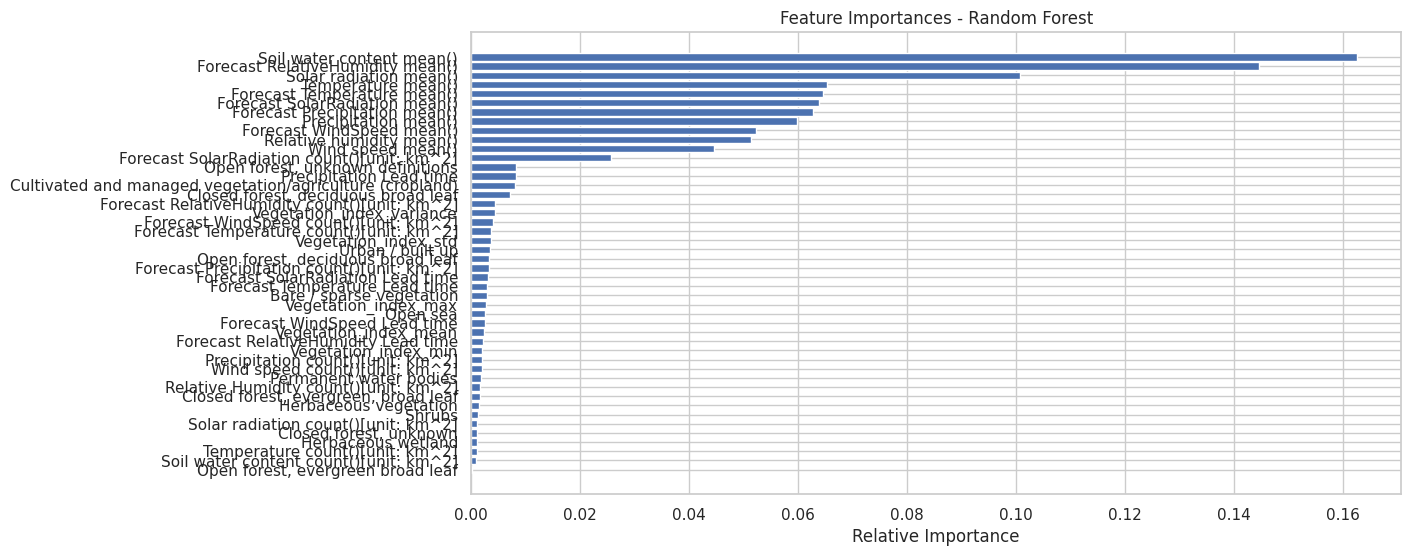

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor

# Fit the Random Forest model
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X, y)

# Get feature importances
importances = rf.feature_importances_
indices = np.argsort(importances)

# Create the feature importance plot
plt.figure(figsize=(12, 6))
plt.title('Feature Importances - Random Forest')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [X.columns[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()
